In [36]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from electrostatic import compute_electrostatic_interactions
from graphormer import compute_graphormer_distances
from commute import compute_commute_distances

In [37]:
# Test graphs
adj_dict = {}

# 6-ring
adj = np.asarray([[0, 1, 0, 0, 0, 1],
                [1, 0, 1, 0, 0, 0],
                [0, 1, 0, 1, 0, 0],
                [0, 0, 1, 0, 1, 0],
                [0, 0, 0, 1, 0, 1],
                [1, 0, 0, 0, 1, 0]])
adj_dict['ring'] = adj

# 5-path
G = nx.path_graph(5)
adj = nx.to_numpy_array(G)
adj_dict['5-path'] = adj

# 4-clique
adj = 1 - np.eye(4)
adj_dict['4-clique'] = adj

# 4-barbell
H = nx.barbell_graph(4, 0)
adj = nx.to_numpy_array(H)
adj_dict['4-barbell'] = adj

4-barbell graph


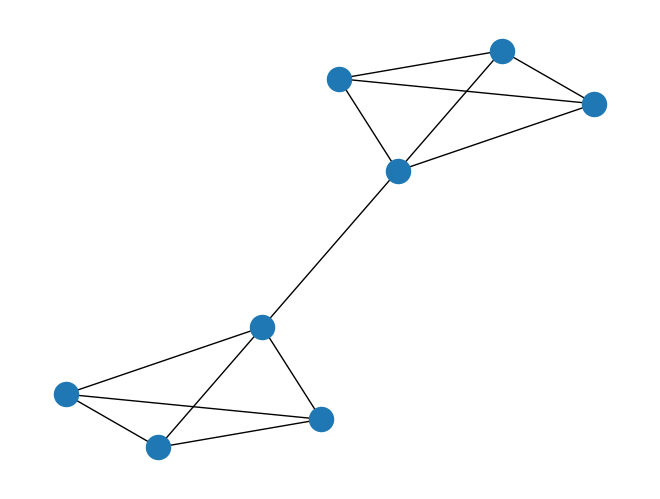

In [38]:
print("4-barbell graph")
nx.draw(H)


In [39]:
# Test electrostatic interaction
for graph_type, adj in adj_dict.items():
    print("Graph type:", graph_type)
    print(compute_electrostatic_interactions(adj).round(2))

Graph type: ring
[[ 0.   -0.42 -0.67 -0.75 -0.67 -0.42]
 [-0.42  0.   -0.42 -0.67 -0.75 -0.67]
 [-0.67 -0.42  0.   -0.42 -0.67 -0.75]
 [-0.75 -0.67 -0.42  0.   -0.42 -0.67]
 [-0.67 -0.75 -0.67 -0.42  0.   -0.42]
 [-0.42 -0.67 -0.75 -0.67 -0.42  0.  ]]
Graph type: 5-path
[[ 0.  -0.2 -0.6 -1.2 -2. ]
 [-0.8  0.  -0.4 -1.  -1.8]
 [-1.4 -0.6  0.  -0.6 -1.4]
 [-1.8 -1.  -0.4  0.  -0.8]
 [-2.  -1.2 -0.6 -0.2  0. ]]
Graph type: 4-clique
[[ 0.   -0.25 -0.25 -0.25]
 [-0.25  0.   -0.25 -0.25]
 [-0.25 -0.25  0.   -0.25]
 [-0.25 -0.25 -0.25  0.  ]]
Graph type: 4-barbell
[[ 0.   -0.25 -0.25 -0.12 -0.62 -1.   -1.   -1.  ]
 [-0.25  0.   -0.25 -0.12 -0.62 -1.   -1.   -1.  ]
 [-0.25 -0.25  0.   -0.12 -0.62 -1.   -1.   -1.  ]
 [-0.38 -0.38 -0.38  0.   -0.5  -0.87 -0.87 -0.87]
 [-0.88 -0.88 -0.87 -0.5   0.   -0.38 -0.37 -0.37]
 [-1.   -1.   -1.   -0.63 -0.12  0.   -0.25 -0.25]
 [-1.   -1.   -1.   -0.63 -0.13 -0.25  0.   -0.25]
 [-1.   -1.   -1.   -0.63 -0.12 -0.25 -0.25  0.  ]]


In [40]:
# Test graphormer distance
for graph_type, adj in adj_dict.items():
    print("Graph type:", graph_type)
    print(compute_graphormer_distances(adj, adj.shape[0]))

Graph type: ring
[[0 1 2 3 2 1]
 [1 0 1 2 3 2]
 [2 1 0 1 2 3]
 [3 2 1 0 1 2]
 [2 3 2 1 0 1]
 [1 2 3 2 1 0]]
Graph type: 5-path
[[0 1 2 3 4]
 [1 0 1 2 3]
 [2 1 0 1 2]
 [3 2 1 0 1]
 [4 3 2 1 0]]
Graph type: 4-clique
[[0 1 1 1]
 [1 0 1 1]
 [1 1 0 1]
 [1 1 1 0]]
Graph type: 4-barbell
[[0 1 1 1 2 3 3 3]
 [1 0 1 1 2 3 3 3]
 [1 1 0 1 2 3 3 3]
 [1 1 1 0 1 2 2 2]
 [2 2 2 1 0 1 1 1]
 [3 3 3 2 1 0 1 1]
 [3 3 3 2 1 1 0 1]
 [3 3 3 2 1 1 1 0]]


In [41]:
# Test commute distance
for graph_type, adj in adj_dict.items():
    print("Graph type:", graph_type)
    print(compute_commute_distances(adj, adj.shape[0]))

Graph type: ring
[[ 0. 10. 16. 18. 16. 10.]
 [10.  0. 10. 16. 18. 16.]
 [16. 10.  0. 10. 16. 18.]
 [18. 16. 10.  0. 10. 16.]
 [16. 18. 16. 10.  0. 10.]
 [10. 16. 18. 16. 10.  0.]]
Graph type: 5-path
[[ 0.  8. 16. 24. 32.]
 [ 8.  0.  8. 16. 24.]
 [16.  8.  0.  8. 16.]
 [24. 16.  8.  0.  8.]
 [32. 24. 16.  8.  0.]]
Graph type: 4-clique
[[0. 6. 6. 6.]
 [6. 0. 6. 6.]
 [6. 6. 0. 6.]
 [6. 6. 6. 0.]]
Graph type: 4-barbell
[[ 0. 13. 13. 13. 39. 52. 52. 52.]
 [13.  0. 13. 13. 39. 52. 52. 52.]
 [13. 13.  0. 13. 39. 52. 52. 52.]
 [13. 13. 13.  0. 26. 39. 39. 39.]
 [39. 39. 39. 26.  0. 13. 13. 13.]
 [52. 52. 52. 39. 13.  0. 13. 13.]
 [52. 52. 52. 39. 13. 13.  0. 13.]
 [52. 52. 52. 39. 13. 13. 13.  0.]]
